# EMA vs SMA (BASELINE) from assignment spec example

This part of the code serves as the baseline strategy, for the purpose of comparison with RSI. 

# PACKAGE IMPORT

In [2]:
import get_data as gd
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import Asset as a
import numpy as np

In [3]:
#grab data 
df_data = gd.grab_data()

#Hyperparameters
#Adjusted accordingly to compare with proposed strategy 
start_time = 360
end_time = 450

df_data = df_data[start_time:end_time]

# Baseline functions

In [4]:
#baseline algorithm which compares ema with sma
days = range(start_time,end_time)

def baselineFunction(ema, sma):
    assetBase = a.Asset()
    
    in_position = False
    ema = np.asarray(df_data[ema])
    sma = np.asarray(df_data[sma])
    ema_vs_sma = ema > sma #gets indexes when ema is larger than sma
    money_progress = [] #list to store money per day
    
    btc = np.asarray(df_data['close'])
    
    in_position = False
    for i in range(len(df_data)):
        #Buy 
        if not in_position and ema_vs_sma[i]:
            assetBase.buy(btc[i])
            in_position = True
        #Sell
        elif in_position and not ema_vs_sma[i]:
            assetBase.sell(btc[i])
            in_position = False
        
        money_progress.append(assetBase.coin * btc[i] + assetBase.money)
    #Final sell at the end of period
    if in_position:
        assetBase.sell(btc[-1])
        
    return money_progress


# PLOT

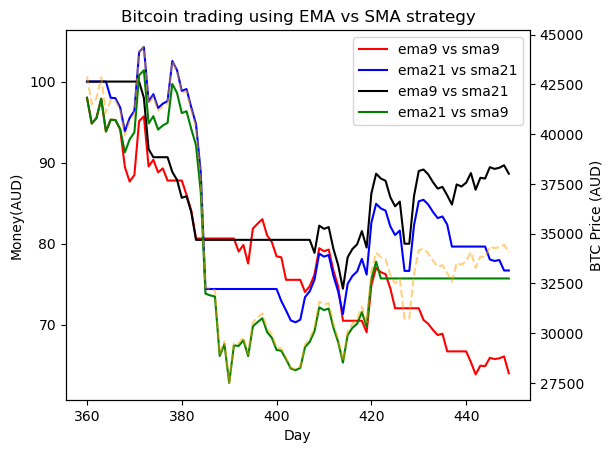

In [5]:
import matplotlib.pyplot as plt

#market condition
price_per_bitcoin = np.asarray(df_data['close'])

fig, ax1 = plt.subplots()
fig.subplots_adjust(right=0.85)
#trade strategies
ema21_sma21 = baselineFunction('ema_21','sma_21')
ema9_sma9 = baselineFunction('ema_9', 'sma_9')
ema21_sma9 = baselineFunction('ema_21', 'sma_9')
ema9_sma21 = baselineFunction ('ema_9', 'sma_21')

#Different plots 
#Only the best ema sma strategy was inserted into the report, for less clutter
ax1.plot(days,ema9_sma9,color='r',label='ema9 vs sma9')
ax1.plot(days,ema21_sma21,color='b',label='ema21 vs sma21')
ax1.plot(days,ema9_sma21,color='k',label='ema9 vs sma21')
ax1.plot(days,ema21_sma9,color='g',label='ema21 vs sma9')

#bitcoin market plot
ax2 = ax1.twinx()
ax2.plot(days, price_per_bitcoin, linestyle='--', color='orange', alpha=0.5, label='BTC Price (AUD)')


#Titles and axis
ax1.legend()
plt.title('Bitcoin trading using EMA vs SMA strategy')
ax1.set_xlabel('Day')
ax1.set_ylabel('Money(AUD)')
ax2.set_ylabel('BTC Price (AUD)')
plt.savefig(f'figure/{start_time}to{end_time}BaselineStrategy.png')
plt.show()